# Lecture 4 - Second order ODEs


<div style="text-align: center;">
  <iframe width="760" height="515" src="https://www.youtube.com/embed/8ePqqZXSMQs?si=u1Mhu_dVAjOIourz" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

## Harmonic oscillator

Suppose Newton's 2nd Law of Motion

$$
F = ma 
$$

where velocity is $ v = \frac{dx}{dt}$ and acceleration is $a = \frac{dv}{dt} = \frac{d^2x}{dt^2}$ . Acceleration is the second derivative of velocity.

Thus, we get the following **second-order differential equation**.

$$
f = m\frac{d^2x}{dt^2}
$$

In classical mechanics, a harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a restoring force F proportional to the displacement x [[wiki](https://en.wikipedia.org/wiki/Harmonic_oscillator)].


For a mass attached to a spring, where $x$ is the displacement from rest, the force exerted by the spring on the mass (which is in the opposite direction) is given by :

$$
f_{spring} = -kx
$$

Relating this to Newton's 2nd law, assuming $ m = 1$ and spring constant $k = 1$,

$$
\begin{align}
f &= ma \\
f &= m\frac{d^2x}{dt^2} &\quad{\text{replace $a$ with definition above}} \\
\frac{f}{m} &= \frac{d^2x}{dt^2} &\quad{\text{re-arrange}}\\
\frac{-kx}{m} &= \frac{d^2x}{dt^2} &\quad{\text{substitute $f$ from above}}\\
-x &= \frac{d^2x}{dt^2} &\quad{\text{since $k = m = 1$}}\\
\ddot{x} &= -x &\quad{\text{using dot notation and swithcing sides}}
\end{align}
$$

To give us a **second-order linear differential equation.**

```{note}
Note that $\ddot{x} = -x$ is $\frac{d^2x}{dt^2} = -x(t)$. The $(t)$ is ommited by convention but it means the same thing.
```

## Solving second-order ODEs

Recall that what we actually want is $x(t)$ (a function that, given $t$, will return a value $x$ telling us where the mass is relative to its rest position) but what we have is a description of the system in terms of a differential equation (describing how the quantity $x$ changes). To **solve** this differential equations means finding $x(t)$. 

### Method 1 : Guess a solution!

What's a pretty good guess for the function $x(t)$ ? Given that we expect this function to oscillate, we can start with our basic oscillating functions , $sin(t)$ and $cos(t)$, the values for which can be seen on the unit circle below.

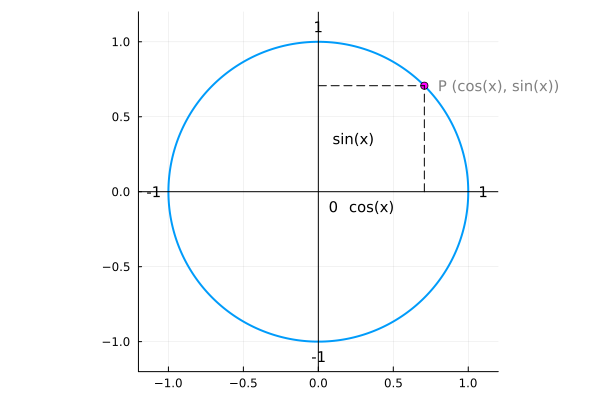

In [1]:
using Plots

# Define the range for the circle
θ = 0:0.01:2π

# Calculate the unit circle coordinates
x = cos.(θ)
y = sin.(θ)

# Plot the unit circle
plot(x, y, aspect_ratio=:equal, linewidth=2, label=false, xlims=(-1.2, 1.2), ylims=(-1.2, 1.2),legend=false)

# Add x and y axes
plot!([0, 0], [-1.2, 1.2], color=:black, linewidth=1, linestyle=:solid)
plot!([-1.2, 1.2], [0, 0], color=:black, linewidth=1, linestyle=:solid)

# Define the angle x (in radians) and calculate the point on the circle
x_angle = π/4
Px = cos(x_angle)
Py = sin(x_angle)

# Plot the point P
scatter!([Px], [Py], color=:magenta)

# Add dashed lines to the point
plot!([Px, Px], [0, Py], linestyle=:dash, color=:black, label=false)
plot!([0, Px], [Py, Py], linestyle=:dash, color=:black, label=false)

# Add text annotations
annotate!(Px + 0.1, Py, text("P (cos(x), sin(x))", :left, 10, :gray))
annotate!(0.1, Py/2, text("sin(x)", :left, 10))
annotate!(Px/2, -0.1, text("cos(x)", :center, 10))

# Add labels for the axes and the unit circle
annotate!(1.1, 0, text("1", :center, 10))
annotate!(-1.1, 0, text("-1", :center, 10))
annotate!(0, 1.1, text("1", :center, 10))
annotate!(0, -1.1, text("-1", :center, 10))

# Add a label for the origin
annotate!(0.1, -0.1, text("0", :center, 10))

# Show the plot
plot!()


We want to try the $sin$ and $cos$ functions but we also need a solution for $x(t)$ that meets the initial conditions and whose **second derivative is proportional to the negative of itself**. 

for the $sin$ function:

$$
\begin{align}
\frac{sin(t)}{dt} &= cos(t) \\
\frac{cos(t)}{dt} &= -sin(t)
\end{align}
$$

if we use $x(t) = sin(t)$, this would **only work** in situations where we always start with the initial position $x_0 = sin(0) = 0$, and the initial velocity $\frac{sin(t)}{dt}(0) = cos(0) = 1$. 

for the $cos$ function:

$$
\begin{align}
\frac{cos(t)}{dt} &= -sin(t) \\
\frac{-sin(t)}{dt} &= -cos(t)
\end{align}
$$

Similarly, if we use $x(t) = cos(t)$, this would **only work** in situations where we always start with the initial position $x_0 = cos(0) = 1$, and the initial velocity $\frac{cos(t)}{dt}(0) = -sin(0) = 0$.

We want a more general solution such that $x(0) = x_0$. **Further suppose that we want it** such that $\frac{dx}{dt}(0) = 0$ (we start at some given initial position $x_0$ at rest.) The following meets these requirements:

$$
x(t) = cos(t)x_0
$$

at $x(0)$, $cos(0) = 1$ which gives us $x(0) = x_0$ and $\frac{dx}{dt}(0) = -sin(0) = 0$

To reiterate in dot notation:

$$
\begin{align}
x(t) &= cos(t)x_0 \\
\dot{x}(t) &= -sin(t)x_0 \\
\ddot{x}(t) &= -cos(t)x_0
\end{align}
$$

For general $m ,k$ (solving the above steps without using $m = k = 1$), gives:

$$
x(t) = cos(\sqrt{\frac{k}{m}}t)x_0
$$

## Method 2 : Taylor Series